# **Linear Regression Health Costs Calculator**

In [3]:
!pip install tensorflow-docs

In [21]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import os
from urllib.request import Request, urlopen, urlretrieve
from tensorflow import keras
from keras import layers
from sklearn.utils import shuffle

In [18]:
# Import data
if not os.path.exists("insurance.csv"):
    url = "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
    req = Request(
        url=url,
        headers={"User-Agent": "Mozilla/5.0"}
    )

    webpage = urlopen(req)

    with open("insurance.csv","wb") as output:
        output.write(webpage.read())

dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [16]:
# Convert categorical data to numbers
dataset["sex"].replace(
    ["female", "male"],
    [0, 1],
    inplace=True
)

dataset["smoker"].replace(
    ["no", "yes"],
    [0, 1],
    inplace=True
)

dataset["region"].replace(
    ['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True
)

dataset = shuffle(dataset).reset_index(drop=True)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,46,0,30.8,3,0,0,9414.92
1,25,1,23.9,5,0,0,5080.10
2,37,1,22.7,3,0,3,6985.51
3,33,0,24.3,0,0,1,4185.10
4,39,0,22.8,3,0,3,7985.82


In [ ]:
# Separating the train and test datasets
train_dataset  = dataset[0:int(0.8*dataset.shape[0])]
test_dataset = dataset[int(0.8*dataset.shape[0]):dataset.shape[0] - 1]

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [22]:
# Creating the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 32)                224       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [23]:
# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10609.7119 - mae: 10609.7119 - mse: 245353776.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 4268.3804 - mae: 4268.3804 - mse: 53494520.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 3284.7014 - mae: 3284.7014 - mse: 40817780.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 3058.0117 - mae: 3058.0117 - mse: 36968208.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 2874.5264 - mae: 2874.5264 - mse: 33563588.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2740.1548 - mae: 2740.1548 - mse: 29659340.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2602.9312 - mae: 2602.9312 - mse: 28514694.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2428.6377 - mae: 2428.6377 - mse: 27378676.0000
Epoch 9/100
34/34 [==========

9/9 [==============================] - 0s 3ms/step


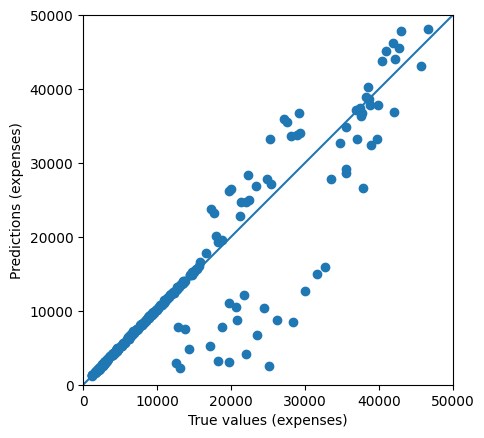

In [24]:
# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)